In [1]:
#assume some unit gaussian 10-D input data
import numpy as np
import matplotlib.pyplot as plt
D = np.random.randn(1000, 500)
hidden_layer_sizes =[500]*10
nonlinearities =['tanh']*len(hidden_layer_sizes)

In [2]:
act={'relu': lambda x: np.maximum(0,x), 'tanh': lambda x: np.tanh(x)}
Hs={}
for i in range(len(hidden_layer_sizes)):
    X=D if i==0 else Hs[i-1] # input at this layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out)*0.01 #layer intialization
    H=np.dot(X,W) #matrix multiplication
    H=act[nonlinearities[i]](H)
    Hs[i]=H
    

input layer had mean -0.000466155174971604 and std 0.9991564968107397
hidden layer 1 had mean -4.8954322800144165e-05 and std 0.2127332370570217
hidden layer 2 had mean -4.8954322800144165e-05 and std 0.04743025044212719
hidden layer 3 had mean -4.8954322800144165e-05 and std 0.010611708615017581
hidden layer 4 had mean -4.8954322800144165e-05 and std 0.0023766199331325634
hidden layer 5 had mean -4.8954322800144165e-05 and std 0.0005301819876706611
hidden layer 6 had mean -4.8954322800144165e-05 and std 0.00011841558937032286
hidden layer 7 had mean -4.8954322800144165e-05 and std 2.632811740290391e-05
hidden layer 8 had mean -4.8954322800144165e-05 and std 5.907520464427353e-06
hidden layer 9 had mean -4.8954322800144165e-05 and std 1.3264332110620807e-06
hidden layer 10 had mean -4.8954322800144165e-05 and std 2.942736738540975e-07


ValueError: ignored

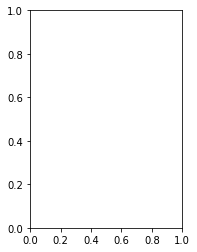

In [3]:
# look at distribution at each layer
print('input layer had mean {} and std {}'.format(np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i, H in Hs.items()]
layer_stds = [np.std(H) for i, H in Hs.items()]
for i,H in Hs.items():
    print('hidden layer {} had mean {} and std {}'.format(i+1, layer_means[1], layer_stds[i]))

#plot the means and standard deviations
plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(),layer_stds, 'or-')
plt.title('layer std')

#plot the raw distributions

plt.figure(figsize=(20,5))
for i, H in Hs.items():
    plt.subplot(1, len(Hs), i+1)
    #print(H)
    plt.hist(H.ravel(), 30, range=(-1,1))